<img alt='UCL' src="images/ucl_logo.png" align='center'>


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](018_Python_xxx.ipynb)



# NASA MODIS Earthdata


## Introduction

### Purpose 

In this notebook, we will use high-level codes from `geog0111` to familiarise ourselves with downloading and interpreting NASA MODIS datasets from [`NASA EarthData`](https://urs.earthdata.nasa.gov). We will also be visualising these data in this notebook.

We will be **introducing NASA MODIS land products**, and viewing the MODIS LAI product as an example. This notebook should serve as an introduction to accessing similar products from Earthdata.

We will use [`pathlib`](https://docs.python.org/3/library/pathlib.html) and the local package [gurlpath](geog0111/gurlpath) derived from [`urlpath`](https://github.com/chrono-meter/urlpath) to open object streams from URLs and files. 

For further work on NASA datasets, a student might consider using an explicit [API](https://en.wikipedia.org/wiki/Application_programming_interface) to access the data. If all you want is to get hold of some data product for some defined location and time, then you might use an API such as [Appeears](https://lpdaacsvc.cr.usgs.gov/appeears/).


### Prerequisites

The are no assumptions that you know any python code at this point: the use of code should be high enough level that you can easily understand what is going on, and use the constructs shown to modify the codes to your purpose.

For completeness, we list the python and other codes below.

We do assume that you have basic familiarity with using [Jupyter notebooks](001_Notebook_use.ipynb).

### Test

You should run a [NASA account test](notebooks/004_Accounts.ipynb#Test) if you have not already done so.

`cylog` stores your username and password in a file that only you can read. We can use this as a convenient way to pull some NASA MODIS data.

### Code used



In the code below, we use the following python constructs:

* [`import` modules](https://www.w3schools.com/python/python_modules.asp)
* [Error trapping: `try ... except`](https://www.w3schools.com/python/python_try_except.asp#:~:text=The%20try%20block%20lets%20you,the%20try%2D%20and%20except%20blocks.)
* [`assert`](https://www.w3schools.com/python/ref_keyword_assert.asp)
* [`dictionary`](https://www.w3schools.com/python/python_dictionaries.asp)
* [`print()`](https://www.w3schools.com/python/ref_func_print.asp)
* [string `format()`](https://www.w3schools.com/python/ref_string_format.asp)
* [variables](https://www.w3schools.com/python/python_variables.asp)
* [keyword arguments](https://www.w3schools.com/python/gloss_python_function_keyword_arguments.asp)
* [np.logical_or](https://numpy.org/doc/stable/reference/generated/numpy.logical_or.html)

Their meaning should be quite obvious from their context, but we provide links here to materiual at [https://www.w3schools.com/](https://www.w3schools.com/) should you wish to understand them further here.

## MODIS LAI product 

To introduce geospatial processing, we will use a dataset from the MODIS LAI product over the UK. 

The data product [MOD15](https://modis.gsfc.nasa.gov/data/dataprod/mod15.php) LAI/FPAR has been generated from NASA MODIS sensors Terra and Aqua data since 2002. We are now in dataset collection 6 (the data version to use).

    LAI is defined as the one-sided green leaf area per unit ground area in broadleaf canopies and as half the total needle surface area per unit ground area in coniferous canopies. FPAR is the fraction of photosynthetically active radiation (400-700 nm) absorbed by green vegetation. Both variables are used for calculating surface photosynthesis, evapotranspiration, and net primary production, which in turn are used to calculate terrestrial energy, carbon, water cycle processes, and biogeochemistry of vegetation. Algorithm refinements have improved quality of retrievals and consistency with field measurements over all biomes, with a focus on woody vegetation.
    
We use such data to map and understand about the dynamics of terrestrial vegetation / carbon, for example, for climate studies.

The raster data are arranged in tiles, indexed by row and column, to cover the globe:


![MODIS tiles](https://www.researchgate.net/profile/J_Townshend/publication/220473201/figure/fig5/AS:277546596880390@1443183673583/The-global-MODIS-Sinusoidal-tile-grid.png)


### Exercise

The pattern on the tile names is `hXXvYY` where `XX` is the horizontal coordinate and `YY` the vertical.


* use the map above to work out the names of the two tiles that we will need to access data over the UK
* set the variable `tiles` to contain these two names in a list

For example, for the two tiles covering Madagascar, we would set:

    tiles = ['h22v10','h22v11']

In [1]:
# tiles for the UK

tiles = ['h17v03', 'h17v04', 'h18v03', 'h18v04']


### Accessing NASA MODIS URLs

<span class="burk">**Warning: The NASA data servers tend to be down for maintainance on Wednesday morning EST**</span>

Although you can access MODIS datasets through the [NASA Earthdata](https://urs.earthdata.nasa.gov/home) interface, there are many occasions that we would want to just automatically pull datasets. As we note above, we could use some existing API for this, such as [Appeears](https://lpdaacsvc.cr.usgs.gov/appeears/), but we are aiming here at being able to ultimately develop codes that do this from a lower-level perspective. 

Automation has many roles, and is particularly useful when you want a time series of data that might involve many files. For example, for analysing LAI or other variables over space/time) we will want to write code that pulls the time series of data. 

If you visit the site [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006), you will see 'date' style links (e.g. `2018.09.30`) through to sub-directories. 

In these, e.g. [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/) you will find URLs of a set of files. 

The files pointed to by the URLs are the MODIS MOD15 4-day composite 500 m LAI/FPAR product [MCD15A3H](https://lpdaac.usgs.gov/dataset_discovery/modis/modis_products_table/mcd15a3h_v006).

There are links to several datasets on the page, including 'quicklook files' that are jpeg format images of the datasets, e.g.:

![MCD15A3H.A2018273.h17v03](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/BROWSE.MCD15A3H.A2018273.h17v03.006.2018278143630.1.jpg)

as well as `xml` files and `hdf` datasets. 



### Data Products

If we look at the dataserver we hae specified [https://e4ftl01.cr.usgs.gov](https://e4ftl01.cr.usgs.gov), we will see that a number of sub-directories exist. Each of these 'server directories' points to a different data stream:

    [DIR] ASTT/                   2019-08-05 07:54    -   
    [DIR] COMMUNITY/              2020-06-02 08:45    -   
    [DIR] ECOSTRESS/              2020-04-09 10:30    -   
    [DIR] GEDI/                   2020-02-10 09:58    -   
    [DIR] MEASURES/               2020-03-17 10:55    -   
    [DIR] MOLA/                   2020-06-01 09:20    -   
    [DIR] MOLT/                   2020-04-14 08:06    -   
    [DIR] MOTA/                   2019-12-27 06:49    -   
    [DIR] VIIRS/                  2020-06-23 10:26    -   

For example, we might notice [VIIRS](https://e4ftl01.cr.usgs.gov/VIIRS) which takes us to the [VIIRS data products](https://viirsland.gsfc.nasa.gov), or [GEDI](https://e4ftl01.cr.usgs.gov/GEDI) [spaceborne lidar](https://gedi.umd.edu/) data. Each of these data streams will have their own properties that we need to appreciate before using them.

### MOTA

The URL we have used above, [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/) starts with a call to the server directory `MOTA`, so we can think of `https://e4ftl01.cr.usgs.gov/MOTA` as the base level URL.

MOTA refers to combined MODIS Terra and Aqua datasets. Similarly, MOLA and MOLT refer to datasets generated from single MODIS sensors of Aqua and Terra, respectively.

The rest of the directory information `MCD15A3H.006/2018.09.30` tells us:

* the product name `MCD15A3H`
* the product version `006`
* the date of the dataset `2018.09.30`

There are several ways we could specify the date information. The most 'human readable' is probably `YYYY.MM.DD` as given here. 

### MODIS filename format

If we vist the link to a particular date for this dataset  [https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/](https://e4ftl01.cr.usgs.gov/MOTA/MCD15A3H.006/2018.09.30/), we see some files that have the suffix `hdf`.

The `hdf` filenames are of the form:

    MCD15A3H.A2018273.h35v10.006.2018278143650.hdf
    
where:

* the first field (`MCD15A3H`) gives the product code
* the second (`A2018273`) gives the observation date: day of year `273`, `2018` here
* the third (`h35v10`) gives the 'MODIS tile' code for the data location
* the remaining fields specify the product version number (`006`) and a code representing the processing date.

If we look at the [product specification page](https://lpdaac.usgs.gov/products/mcd15a3hv006/) we see that the data product has multiple data layers. In the case of MCD15A3H, this is:

|SDS Name	|Description	| Units	|Data Type	|Fill Value|	No Data Value	|Valid Range|	Scale Factor
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|-|
| Fpar_500m |	Fraction of Photosynthetically Active Radiation	|Percent|	8-bit unsigned integer	|249 to 255	|N/A	|0 to 100	|0.01
|Lai_500m	|Leaf Area Index|	m²/m²|	8-bit unsigned integer|	249 to 255	|N/A|	0 to 100|	0.1|
|FparLai_QC	|Quality for  FPAR and LAI	|Class Flag	|8-bit unsigned integer	|255|	N/A	|0 to 254	|N/A
| FparExtra_QC	|Extra detail Quality for  FPAR and LAI	|Class Flag|	8-bit unsigned integer|	255	|N/A	|0 to 254	|N/A
|FparStdDev_500m|	Standard deviation of  FPAR	|Percent|	8-bit unsigned integer|	248 to 255	|N/A|	0 to 100	|0.01
|LaiStdDev_500m|	Standard deviation of LAI	|m²/m²|	8-bit unsigned integer|	248 to 255|	N/A	|0 to 100	|0.1


We will use a simple recipe for accessing a dataset and plotting it. All examples below will follow the same pattern.

First, we use the `Modis` class in `geog0111.modis` to set up 

In [9]:
from geog0111.modis import Modis
#######################
# specify what we want
# in a dictionary
#######################
# UK tiles
# specify day of year (DOY) and year

kwargs = {
    'tile'      :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'product'   :    'MCD15A3H',
    'sds'       :    'Lai_500m',
    'db_file'   :    ['data/database.db',f'work/uk_lai_2019.db'],
    'local_dir' :    'work',
}

modis = Modis(**kwargs)

data = modis.get_data(2019,1+4*10)

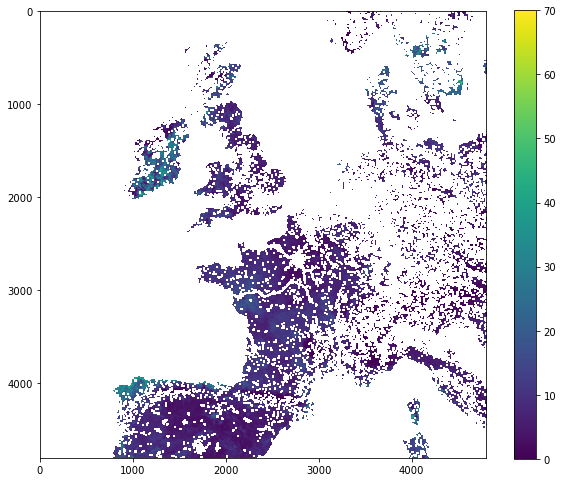

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# get the dataset with a mask
masked = np.ma.masked_where(data['Lai_500m'] > 248, data['Lai_500m'] )

x_size = 10
y_size = 10
fig, ax = plt.subplots(figsize=(x_size,y_size),frameon=False)
img=ax.imshow(masked)
plt.colorbar(img,ax=ax,shrink=0.825)

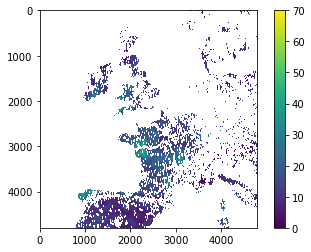

### Download

So, other than some terms (e.g. version number) we can take as defaults, when we want to access a MODIS product as tile data, we need to specify:

* product code
* SDS Name (scientific dataset name)
* tile(s)
* day of year (DOY)
* year

Now we have some appreciation of the MODIS dataset description requirements, we can use the method `mosaic_and_clip()` in `geog0111` to download some example datasets:

    # UK tiles
    tiles = ['h17v03', 'h17v04', 'h18v03', 'h18v04']
    # specify day of year (DOY) and year
    doy,year = 1,2020
    # product
    product = 'MCD15A3H'
    # SDS
    layer = "Lai_500m"


One useful thing we have implemented in `mosaic_and_clip()` is to mosaic data from different tiles together into one contiguous dataset. So, although we will have data specified over four tiles, we will mosaic it together into a single array.

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np
# libraries we need

#######################
# specify what we want
# in a dictionary
#######################
# UK tiles
# specify day of year (DOY) and year

params = {
    'tiles'   :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'product' :    'MCD15A3H',
    'layer'   :    'Lai_500m',
    'verbose' :    True,
}

#######################
# download and interpret
# and mask non-valid numbers by setting to NaN
# see data table above
#######################
try:
    data = mosaic(params)
    assert data is not None
except AssertionError:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[data>248] = np.nan
    #######################
    # print some feedback
    #######################
    print(f'the variable lai contains a dataset of dimension {data.shape}')
    print('for product {product} SDS {layer}'.format(**params))
    print('for day {doy} of year {year} for tiles {tiles}'.format(**params))


### Visualise

We have now generated a dataset, stored in a variable `lai`. We are likely to want to perform some analysis on this, but we might also like to visualise the dataset.

We can do this using a python package [matplotlib](https://matplotlib.org) that we will gain more experience with later.

For now, we will simply implement a typical image visualisation, with a dataset title, and scale bar. We will use a method `visualise()` from our `uclgeog` library to do this.

In [ ]:
# call visualise
title = 'product {product} SDS {layer}\n'.format(**params) + \
        'for day {doy} of year {year} for tiles {tiles}'.format(**params)
# set the max value to 3.0 to be able to see whats going on
plot=visualise(data,title=title,vmax=3.0)

# Exercises

### Exercise: change the year and DOY

Using the lines of code above, download and visualise the LAI dataset for a different DOY and year. Remember that it is a 4-day synthesis, so there are only datasets on doy 1,5,9, ...

Put comments in your code using `#` to start a comment, to describe what you are doing.

You might want to set `verbose` to `True` to get some feedback on what is going on.

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np

#######################
# location: madagascar
#######################
params = {
    'tiles'   :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'doy'     :    5,
    'year'    :    2010,
    'product' :    'MCD15A3H',
    'layer'   :    'Lai_500m',
    'grid'    :    'MOD_Grid_MCD15A3H',
    'verbose' :    True,
    'base_url':   'https://e4ftl01.cr.usgs.gov/MOTA'
}

try:
    data = mosaic(params)
    assert data is not None
except AssertionError:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[data>248] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title,vmax=3.0)

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise

#######################
# doy = 1 + 4 * 20 here
#######################
params = {
    'tiles'  :    ['h17v03', 'h17v04', 'h18v03', 'h18v04'],
    'doy'    :    1+4*30,
    'year'   :    2020,
    'product':    'MCD15A3H',
    'layer'  :    'Lai_500m',
    'grid'   :    'MOD_Grid_MCD15A3H',
    'verbose':    True
}

#######################
# download and interpret
#######################
# check to see if it worked
# and trap errors 
try:
    lai = mosaic(params)
    assert lai is not None
except:
    print("\nThis hasn't worked")
else:
    lai = lai.astype(float)
    lai[lai>248] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(lai,title=title,vmax=3.0)

### Exercise: change the location

Using the lines of code above, download and visualise the LAI dataset for a different location.

You will need to specify the tile or tiles that you wish to use.

As before, put comments in your code using `#` to start a comment, to describe what you are doing.

You might want to set `verbose` to `True` to get some feedback on what is going on.

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np

#######################
# location: madagascar
#######################
params = {
    'tiles'   :    ['h22v10','h22v11'],
    'doy'     :    5,
    'year'    :    2010,
    'product' :    'MCD15A3H',
    'layer'   :    'Lai_500m',
    'grid'    :    'MOD_Grid_MCD15A3H',
    'verbose' :    True,
    'base_url':   'https://e4ftl01.cr.usgs.gov/MOTA'
}
try:
    data = mosaic(params)
    assert data is not None
except AssertionError:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[data>248] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title,vmax=3.0)

### Exercise: change the SDS

Using the lines of code above, download and visualise the LAI dataset for a different location. 

Now, instead of using the data layer `Lai_500m`, visualise another data layer in the LAI dataset. See the table above of [the product specification](https://lpdaac.usgs.gov/products/mcd15a3hv006/) for details.

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np

#######################
# location: madagascar
#######################

params = {
    'tiles'   :    ['h22v10','h22v11'],
    'doy'     :    5,
    'year'    :    2010,
    'product' :    'MCD15A3H',
    'layer'   :    'FparLai_QC',
    'grid'    :    'MOD_Grid_MCD15A3H',
    'verbose' :    True,
    'base_url':   'https://e4ftl01.cr.usgs.gov/MOTA'
}

#######################
# download and interpret
# note the valid range is different
# see the product table above
#######################

try:
    data = mosaic(params)
    assert data is not None
except AssertionError:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[data>254] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title)

### Exercise: change the product to another on MOTA

Using the lines of code above, download and visualise a different MODIS product.

You can see the option codes on the server we have been using by [looking in the directory https://e4ftl01.cr.usgs.gov/MOTA](https://e4ftl01.cr.usgs.gov/MOTA).

You get get the meanings of the codes from simply googling them, or you can look them up on the [MODIS data product page](https://modis.gsfc.nasa.gov/data/dataprod/).

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np

#######################
# location: madagascar
# product MCD64A1 Burned Area
# see product page on
# https://lpdaac.usgs.gov/products/mcd64a1v006/
# we see one of the SDS layers is 'Burn Date'
# and that 1 to 366 are valid
#
# get the grid from 
# https://ladsweb.modaps.eosdis.nasa.gov/filespec/MODIS/6/MCD64A1
#######################
params = {
    'tiles'   :    ['h22v10'],
    'doy'     :    1,
    'year'    :    2020,
    'product' :    'MCD64A1',
    'layer'   :    'Burn Date',
    'grid'    :    'MOD_Grid_Monthly_500m_DB_BA',
    'verbose' :    True,
    'base_url':   'https://e4ftl01.cr.usgs.gov/MOTA'
}

#######################
# download and interpret
# note the valid range is different
# see the product table above
# Use a different variable name: 
# its not lai any more!
#######################
try:
    data = mosaic(params)
    assert data is not None
except:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[np.logical_or(data>366,data<1)] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title)

### Exercise: Snow
    
The MODIS snow products are on a different server to the one we used above, [`https://n5eil01u.ecs.nsidc.org/MOST`](https://n5eil01u.ecs.nsidc.org/MOST) for MODIS Terra data and [`https://n5eil01u.ecs.nsidc.org/MOSA`](https://n5eil01u.ecs.nsidc.org/MOSA) for MODIS Aqua. Product information is available on the [product website](https://nsidc.org/data/myd10a1). Note that there is not combined Terra and Aqua product.

Use the codes above to explore, download, and plot a snow dataset from the `MOD10A1` product.

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np

#######################
# location: E Europe
# product 
# see product page on
# https://nsidc.org/data/MYD10A1/versions/6
# 0-100 is valid
# NDSI_Snow_Cover
# grid is MOD_Grid_Snow_500m
#######################
params = {
    'tiles'   :    ['h19v03'],
    'doy'     :    1,
    'year'    :    2010,
    'product' :    'MOD10A1',
    'layer'   :    'NDSI_Snow_Cover',
    'grid'    :    'MOD_Grid_Snow_500m',
    'verbose' :    True,
    'base_url':   'https://n5eil01u.ecs.nsidc.org/MOST'
}

#######################
# download and interpret
# note the valid range is different
# see the product table above
# Use a different variable name: 
# its not lai any more!
#######################
try:
    data = mosaic(params)
    assert data is not None
except:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[np.logical_or(data>100,data<1)] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title)

In [ ]:
# check for grid info ...
!gdalinfo data/MOD10A1.A2010001.h19v03.006.2016083014706.hdf | grep NDSI_Snow_Cover

### Exercise: Land Cover
    
The MODIS land cover product is `MCD12Q1`.

Use the codes above to explore, download, and plot a  land cover dataset from the `MCD12Q1` product.

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise
import numpy as np

#######################
# location: madagascar
# product MCD64A1 Burned Area
# see product page on
# https://lpdaac.usgs.gov/products/mcd12q1v006/
# we see one of the SDS layers is 'LC_Type1'
# and that 1 to 17 are valid
#
# get the grid from 
# https://ladsweb.modaps.eosdis.nasa.gov/filespec/MODIS/6/MCD64A1
#######################
params = {
    'tiles'   :    ['h22v10'],
    'doy'     :    1,
    'year'    :    2018,
    'product' :    'MCD12Q1',
    'layer'   :    'LC_Type1',
    'grid'    :    'MCD12Q1',
    'verbose' :    True,
    'base_url':   'https://e4ftl01.cr.usgs.gov/MOTA'
}

#######################
# download and interpret
# note the valid range is different
# see the product table above
# Use a different variable name: 
# its not lai any more!
#######################
try:
    data = mosaic(params)
    assert data is not None
except:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[np.logical_or(data>17,data<1)] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title)

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise

#######################
# location: madagascar
# product MCD12C1 yearly Land cover
# see product page on
# https://lpdaac.usgs.gov/products/mcd12q1v006/
# we see one of the SDS layers is 'Majority_Land_Cover_Type_1'
# and that 255 is invalid
#
# get the grid from 
# https://ladsweb.modaps.eosdis.nasa.gov/filespec/MODIS/6/MCD12Q1
#
# Note that date for dataset is 2001.01.01
# from https://e4ftl01.cr.usgs.gov/MOTA/MCD12Q1.006/
# year 2019 & 2020 not there yet!!
#######################
params = {
    'tiles'  :    ['h22v10'],
    'doy'    :    1,
    'year'   :    2018,
    'product':    'MCD12Q1',
    'layer'  :    'LC_Type1',
    'grid'   :    None,
    'verbose':    True
}

#######################
# download and interpret
# note the valid range is different
# see the product table above
# Use a different variable name: 
# its not lai any more!
#######################
try:
    data = mosaic(params)
    assert data is not None
except:
    print("\nThis hasn't worked")
else:
    data = data.astype(float)
    data[data>254] = np.nan
    #######################
    # call visualise
    #######################
    title = 'product {product} SDS {layer}\n'.format(**params) + \
            'for day {doy} of year {year} for tiles {tiles}'.format(**params)
    plot=visualise(data,title=title)

In [ ]:
from uclgeog.process_timeseries import mosaic_and_clip, visualise

#############
# FparLai_QC
#############

#######################
# single tile here
# for SDS FparLai_QC
# note that valid values different here
#######################
params = {
    'tiles'  :    ['h18v03'],
    'doy'    :    1+4*30,
    'year'   :    2020,
    'product':    'MCD15A3H',
    'layer'  :    'FparLai_QC',
    'verbose':    True
}

#######################
# download and interpret
#######################
lai = mosaic_and_clip(**params).astype(float)
lai[lai>254] = np.nan
#######################
# call visualise
# Don't' set vmax now 
# as we want to see the 
# full range of values
#######################
title = 'product {product} SDS {layer}\n'.format(**params) + \
        'for day {doy} of year {year} for tiles {tiles}'.format(**params)
plot=visualise(lai,title=title)

# Summary

In these notes, we have introduced the characteristics of MODIS data products, and learned how to specify, access, and display them for a few servers. You will have accessed a number of products under a number of conditions in the exercises, but you are encouraged to explore this further.

The main item to do with using data products of this sort, that we haven't covered yet, is the interpretation of Quality Assurance (QA) data. This is often packed information into bits, and can be a little tricky at first. However, as with above, once you have a little familiarisation with a few cases, you will be able to applky this more widely.

You should spend some time going through the various links to explore the different datasets, and try out the exercises above for various products. The familiarity you gain from this will help when it comes to building our own codes later on.


[<img src="images/noun_post_2109127.svg" width="50" align='right'>](016_Python_for.ipynb)
[<img src="images/noun_pre_2109128.svg" width="50" align='right'>](014_Python_groups.ipynb)
